In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Collisions.csv')
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [3]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [4]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.rename(columns={'X':'LONGITUDE','Y':'LATITUDE'},inplace=True)

In [6]:
import folium
from folium.plugins import MarkerCluster

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LONGITUDE        213797 non-null  float64
 1   LATITUDE         213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

In [9]:
df.isnull().sum()

LONGITUDE            7469
LATITUDE             7469
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149443
LOCATION             4586
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209491
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26499
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11967
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191078
UNDERINFL           26479
WEATHER             26688
ROADCOND            26608
LIGHTCOND           26776
PEDROWNOTGRNT      216078
SDOTCOLNUM          94061
SPEEDING           211353
ST_COLCODE           9413
ST_COLDESC          26499
SEGLANEKEY              0
CROSSWALKKEY

In [8]:
df.shape

(221266, 40)

In [9]:
df.describe()

,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,213797.000000,213797.000000,221266.000000,221266.000000,221266.000000,71823.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221265.000000,1.272050e+05,221266.000000,2.212660e+05
mean,-122.330752,47.620205,110633.500000,144603.603179,144831.128840,37616.272768,2.226230,0.038103,0.027293,1.728544,0.373844,0.015149,0.001681,13.383558,7.971063e+06,261.441573,9.588454e+03
std,0.030054,0.056040,63874.136669,89039.925169,89413.579421,51905.450406,1.470364,0.201745,0.164345,0.831224,0.732086,0.157908,0.044562,7.302961,2.611523e+06,3248.850406,7.150262e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577302,55317.250000,71603.250000,71603.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616053,110633.500000,127122.500000,127122.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,165949.750000,209654.750000,209874.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221266.000000,333683.000000,335183.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [10]:
map = folium.Map(location=[47.606209, -122.332069], zoom_start=10)
map_clust = MarkerCluster().add_to(map)
location = df[['LATITUDE', 'LONGITUDE']][df['LONGITUDE'].notnull()][:5000]
loc = location.values.tolist()
for i in range(len(loc)):
  folium.Marker(loc[i]).add_to(map_clust)
map

#### EDA

In [11]:
df= df.drop(['LONGITUDE','LATITUDE','INTKEY','COLDETKEY','REPORTNO','LOCATION',
              'EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INJURIES','SERIOUSINJURIES',
              'FATALITIES','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL',
              'PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'],axis=1)
# dropping columns

In [12]:
df.columns.tolist()

['OBJECTID',
 'INCKEY',
 'STATUS',
 'ADDRTYPE',
 'SEVERITYCODE',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'JUNCTIONTYPE',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'ST_COLCODE']

<Axes: xlabel='STATUS', ylabel='count'>

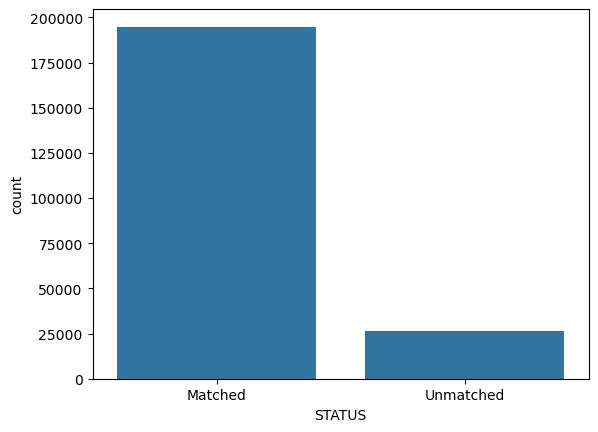

In [13]:
sns.countplot(data=df,x='STATUS')

<Axes: xlabel='ADDRTYPE', ylabel='count'>

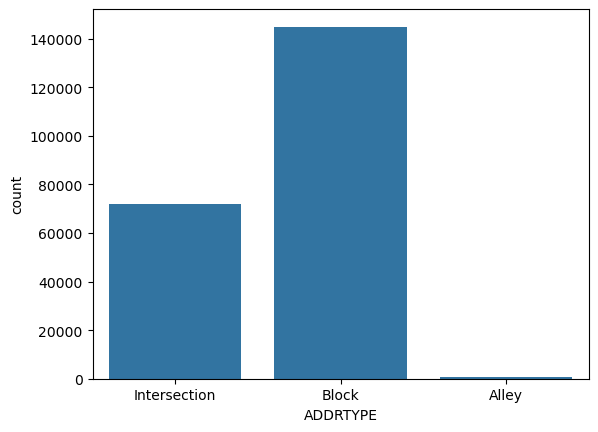

In [14]:
sns.countplot(data=df,x='ADDRTYPE')

In [15]:
null=df.isnull().sum()
null

OBJECTID             0
INCKEY               0
STATUS               0
ADDRTYPE          3712
SEVERITYCODE         1
COLLISIONTYPE    26499
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
JUNCTIONTYPE     11967
WEATHER          26688
ROADCOND         26608
LIGHTCOND        26776
ST_COLCODE        9413
dtype: int64

In [16]:
df['ST_COLCODE'] = df['ST_COLCODE'].fillna(0)
df['SEVERITYCODE'] = df['SEVERITYCODE'].fillna(0)

df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')

df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna(0)
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(0,'others')

df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

In [17]:
null=df.isnull().sum()
null

OBJECTID         0
INCKEY           0
STATUS           0
ADDRTYPE         0
SEVERITYCODE     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
dtype: int64

In [18]:
from sklearn import preprocessing
addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE'] = addrtype.transform(df['ADDRTYPE'])
#Addtype

In [19]:
#status
from sklearn import preprocessing
status = preprocessing.LabelEncoder()
status.fit(['Unmatched','Matched'])
df['STATUS'] = status.transform(df['STATUS'])


#weather
from sklearn import preprocessing
weathercond = preprocessing.LabelEncoder()
weathercond.fit(df['WEATHER'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])


#Road
from sklearn import preprocessing
roadcond = preprocessing.LabelEncoder()
roadcond.fit(df['ROADCOND'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])


#light
from sklearn import preprocessing
light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND'] = light.transform(df['LIGHTCOND'])


#collision type
from sklearn import preprocessing
coll = preprocessing.LabelEncoder()
coll.fit(df['COLLISIONTYPE'])
df['COLLISIONTYPE'] = coll.transform(df['COLLISIONTYPE'])


#junction type
from sklearn import preprocessing
jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE'] = jun.transform(df['JUNCTIONTYPE'])

In [20]:
df.head()

,OBJECTID,INCKEY,STATUS,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,1,326234,0,2,2,6,2,1,0,1,1,2,0,5,2
1,2,326246,0,2,2,0,4,0,0,2,1,7,8,2,10
2,3,329254,0,1,1,9,4,0,0,3,4,2,0,5,11
3,4,21200,0,2,1,3,2,0,0,2,1,7,8,2,28
4,5,17000,1,1,0,10,0,0,0,0,3,12,9,9,0


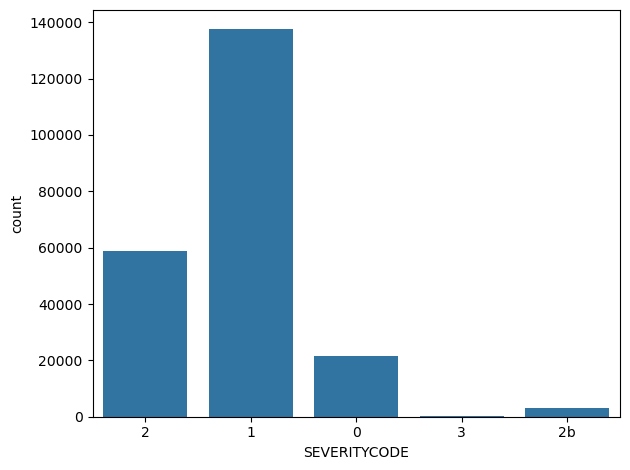

In [21]:
sns.countplot(data=df,x='SEVERITYCODE')
plt.tight_layout()
plt.show()


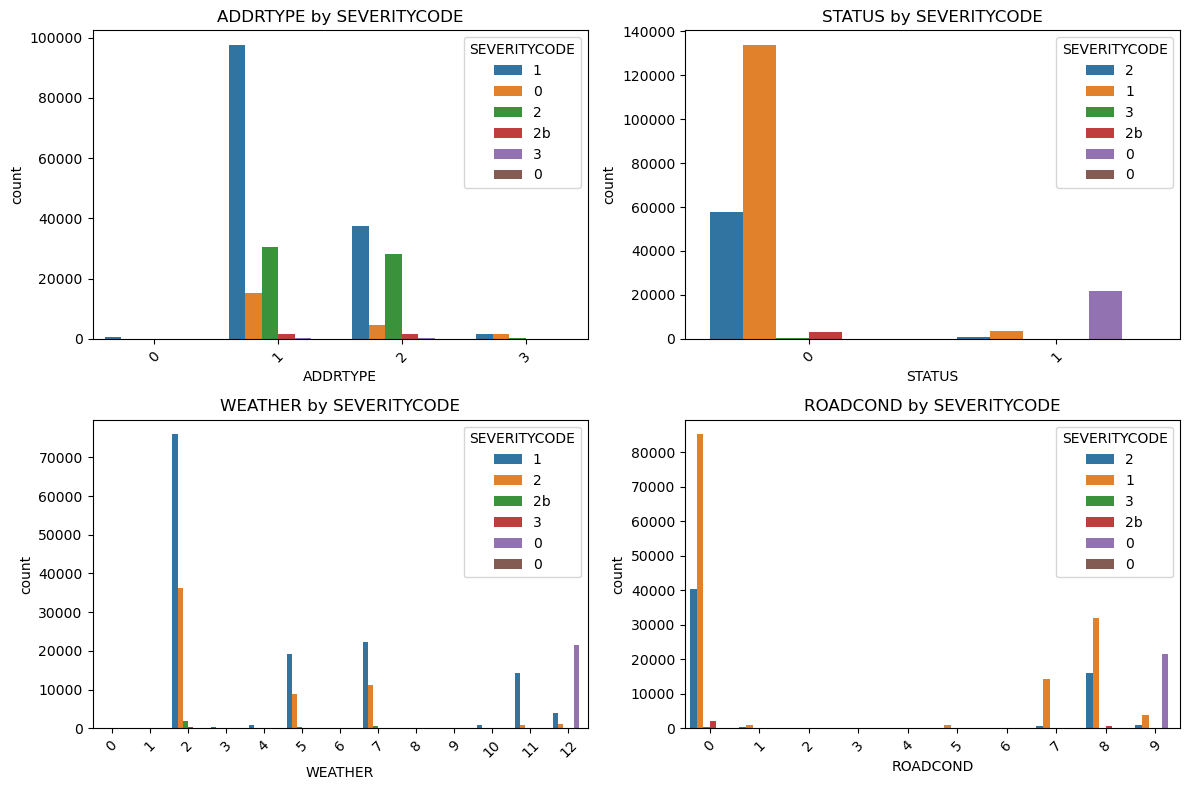

In [22]:
cols = ['ADDRTYPE', 'STATUS', 'WEATHER', 'ROADCOND']
fig, axes = plt.subplots(2, 2, figsize=(12,8))

for ax, col in zip(axes.flat, cols):
    sns.countplot(x=col, hue='SEVERITYCODE', data=df, ax=ax)
    ax.set_title(f'{col} by SEVERITYCODE')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


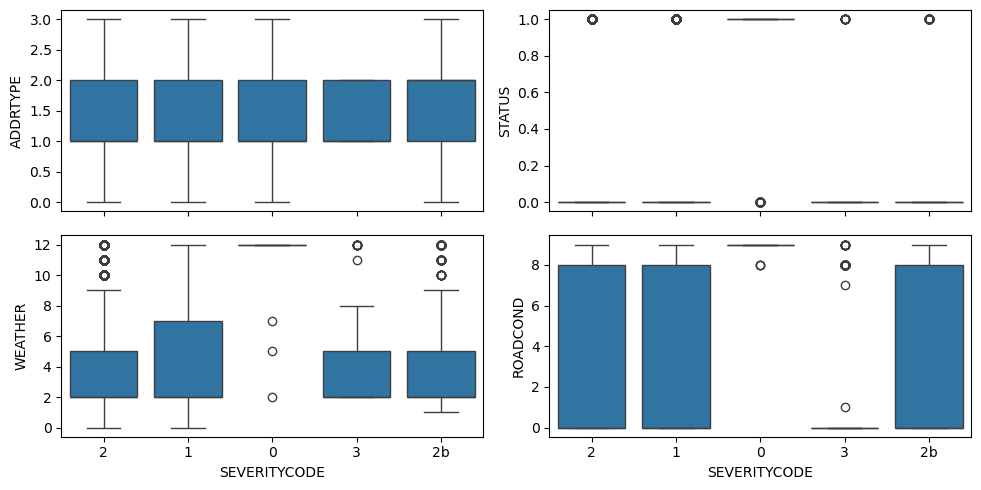

In [23]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
sns.boxplot(ax=axes[0, 0], data=df, x='SEVERITYCODE', y='ADDRTYPE')
sns.boxplot(ax=axes[0, 1], data=df, x='SEVERITYCODE', y='STATUS')
sns.boxplot(ax=axes[1, 0], data=df, x='SEVERITYCODE', y='WEATHER')
sns.boxplot(ax=axes[1, 1], data=df, x='SEVERITYCODE', y='ROADCOND')
plt.tight_layout()
plt.show()


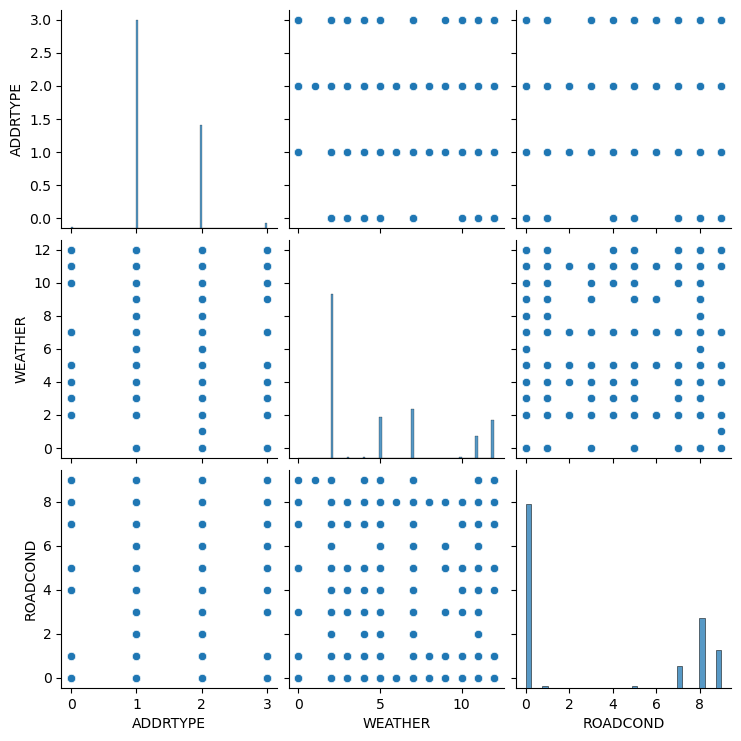

In [24]:
sns.pairplot(df[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND']])

<Axes: >

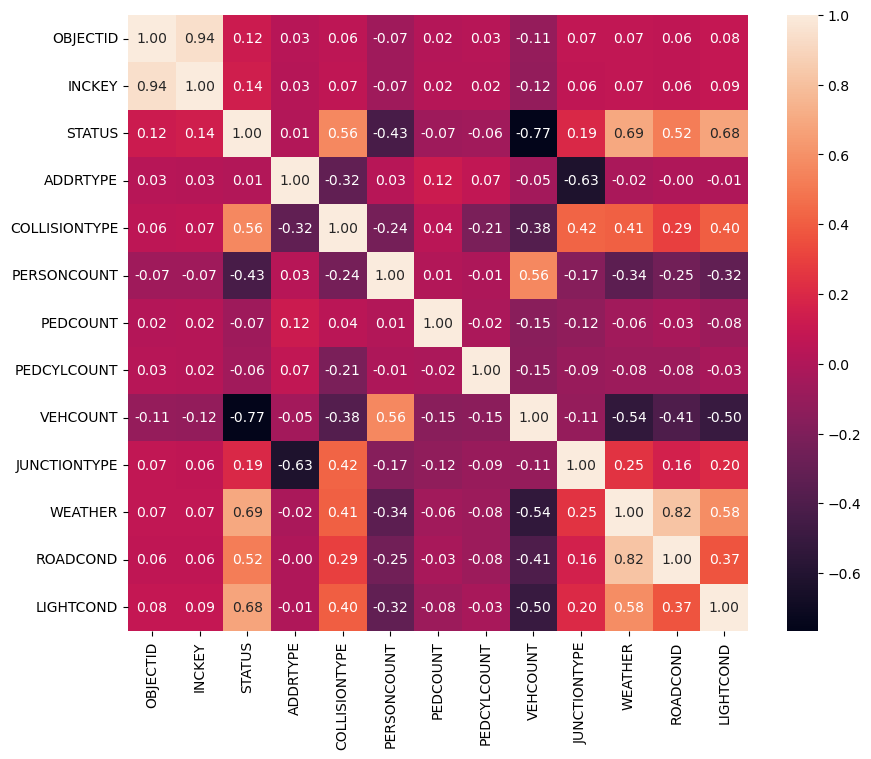

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f')

#### Mdeling and Evaluation

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

In [66]:
df2=pd.read_csv('Collisions.csv')

In [67]:
#Split data
X = df2[['OBJECTID','INCKEY','STATUS','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT',
         'VEHCOUNT','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = df2['SEVERITYCODE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [81]:
# Train set
print(X_train.shape,y_train.shape)


(177012, 13) (177012,)


In [82]:
#test SET
print(X_test.shape,y_test.shape)

(44254, 13) (44254,)


In [83]:
df2.isnull().sum()


X                    7469
Y                    7469
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149443
LOCATION             4586
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209491
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26499
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11967
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191078
UNDERINFL           26479
WEATHER             26688
ROADCOND            26608
LIGHTCOND           26776
PEDROWNOTGRNT      216078
SDOTCOLNUM          94061
SPEEDING           211353
ST_COLCODE           9413
ST_COLDESC          26499
SEGLANEKEY              0
CROSSWALKKEY

In [85]:
X = X.dropna()
y = y.loc[X.index]

In [86]:
#K Nearest Neighbors
k=17
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

ValueError: could not convert string to float: 'Matched'

In [71]:
knn_pred = knn.predict(X_test)
knn_pred

NameError: name 'knn' is not defined